In [103]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('../datasets/cleaned/Prepared_Dataframe.csv')

In [105]:
df.head()

,Unnamed: 0,OutfitName,outfitDesc,outfitViews,outfitLikes,Ratio,Innerwear ClothingItemName,Innerwear wearType,Innerwear ImagePath,Innerwear ImagePath 256x256,...,Outerwear 2nd Dominant Color,Outerwear 2nd Dominant Hex Code,Outerwear 2nd Dominant Color Name,Outerwear 3rd Dominant Color,Outerwear 3rd Dominant Hex Code,Outerwear 3rd Dominant Color Name,Outerwear 4th Dominant Color,Outerwear 4th Dominant Hex Code,Outerwear 4th Dominant Color Name,Good_Outfit
0,120161271,Being a Vans shoe model with Luke. Idk about t...,A fashion look from April 2014 featuring destr...,188.0,9.0,0.047872,nirvana distressed t-shirt,2.0,raw/images/120161271/1.jpg,datasets/images256x256/120161271/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,143656996,These Chanel bags is a bad habit .x,12.19.14,562.0,32.0,0.056940,monki singlet,2.0,raw/images/143656996/1.jpg,datasets/images256x256/143656996/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,216470135,the people i choose never choose me and my hea...,A fashion look from February 2017 by exco feat...,1580.0,395.0,0.250000,isabel marant alpaca blend jumper,2.0,raw/images/216470135/1.jpg,datasets/images256x256/216470135/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,216220312,Be happy!,A fashion look from February 2017 by rasa-j fe...,591.0,233.0,0.394247,oasis shadow bird knit pink,2.0,raw/images/216220312/1.jpg,datasets/images256x256/216220312/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,192203629,yellow grey,A fashion look from February 2016 by lifestyle...,1122.0,153.0,0.136364,white cute animal printed ladies t-shirt,2.0,raw/images/192203629/2.jpg,datasets/images256x256/192203629/2.jpg,...,"(80, 77, 74)",#4D4D4D,gray30,"(100, 95, 91)",#696158,Pantone 405 C,"(106, 100, 100)",#696969,DimGray,False


In [106]:
#Rename the first column to setID
df.rename(columns={'Unnamed: 0':'setID'}, inplace=True)

In [107]:
df.head()

,setID,OutfitName,outfitDesc,outfitViews,outfitLikes,Ratio,Innerwear ClothingItemName,Innerwear wearType,Innerwear ImagePath,Innerwear ImagePath 256x256,...,Outerwear 2nd Dominant Color,Outerwear 2nd Dominant Hex Code,Outerwear 2nd Dominant Color Name,Outerwear 3rd Dominant Color,Outerwear 3rd Dominant Hex Code,Outerwear 3rd Dominant Color Name,Outerwear 4th Dominant Color,Outerwear 4th Dominant Hex Code,Outerwear 4th Dominant Color Name,Good_Outfit
0,120161271,Being a Vans shoe model with Luke. Idk about t...,A fashion look from April 2014 featuring destr...,188.0,9.0,0.047872,nirvana distressed t-shirt,2.0,raw/images/120161271/1.jpg,datasets/images256x256/120161271/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,143656996,These Chanel bags is a bad habit .x,12.19.14,562.0,32.0,0.056940,monki singlet,2.0,raw/images/143656996/1.jpg,datasets/images256x256/143656996/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,216470135,the people i choose never choose me and my hea...,A fashion look from February 2017 by exco feat...,1580.0,395.0,0.250000,isabel marant alpaca blend jumper,2.0,raw/images/216470135/1.jpg,datasets/images256x256/216470135/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,216220312,Be happy!,A fashion look from February 2017 by rasa-j fe...,591.0,233.0,0.394247,oasis shadow bird knit pink,2.0,raw/images/216220312/1.jpg,datasets/images256x256/216220312/1.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,192203629,yellow grey,A fashion look from February 2016 by lifestyle...,1122.0,153.0,0.136364,white cute animal printed ladies t-shirt,2.0,raw/images/192203629/2.jpg,datasets/images256x256/192203629/2.jpg,...,"(80, 77, 74)",#4D4D4D,gray30,"(100, 95, 91)",#696158,Pantone 405 C,"(106, 100, 100)",#696969,DimGray,False


In [108]:
df.columns

Index(['setID', 'OutfitName', 'outfitDesc', 'outfitViews', 'outfitLikes',
       'Ratio', 'Innerwear ClothingItemName', 'Innerwear wearType',
       'Innerwear ImagePath', 'Innerwear ImagePath 256x256',
       'Innerwear ImagePath BG Removed', 'Innerwear 1st Dominant Color',
       'Innerwear 1st Dominant Hex Code', 'Innerwear 1st Dominant Color Name',
       'Innerwear 2nd Dominant Color', 'Innerwear 2nd Dominant Hex Code',
       'Innerwear 2nd Dominant Color Name', 'Innerwear 3rd Dominant Color',
       'Innerwear 3rd Dominant Hex Code', 'Innerwear 3rd Dominant Color Name',
       'Innerwear 4th Dominant Color', 'Innerwear 4th Dominant Hex Code',
       'Innerwear 4th Dominant Color Name', 'Bottomwear ClothingItemName',
       'Bottomwear wearType', 'Bottomwear ImagePath',
       'Bottomwear ImagePath 256x256', 'Bottomwear ImagePath BG Removed',
       'Bottomwear 1st Dominant Color', 'Bottomwear 1st Dominant Hex Code',
       'Bottomwear 1st Dominant Color Name', 'Bottomwear 2nd Do

In [109]:
dfcolor = df[["Innerwear 1st Dominant Color", "Innerwear 2nd Dominant Color", "Innerwear 3rd Dominant Color", "Innerwear 4th Dominant Color", "Bottomwear 1st Dominant Color", "Bottomwear 2nd Dominant Color", "Bottomwear 3rd Dominant Color", "Bottomwear 4th Dominant Color", "Accessoire 1st Dominant Color", "Accessoire 2nd Dominant Color", "Accessoire 3rd Dominant Color", "Accessoire 4th Dominant Color", "Shoes 1st Dominant Color", "Shoes 2nd Dominant Color", "Shoes 3rd Dominant Color", "Shoes 4th Dominant Color", "Outerwear 1st Dominant Color", "Outerwear 2nd Dominant Color", "Outerwear 3rd Dominant Color", "Outerwear 4th Dominant Color"]] 

In [110]:
dfcolor

,Innerwear 1st Dominant Color,Innerwear 2nd Dominant Color,Innerwear 3rd Dominant Color,Innerwear 4th Dominant Color,Bottomwear 1st Dominant Color,Bottomwear 2nd Dominant Color,Bottomwear 3rd Dominant Color,Bottomwear 4th Dominant Color,Accessoire 1st Dominant Color,Accessoire 2nd Dominant Color,Accessoire 3rd Dominant Color,Accessoire 4th Dominant Color,Shoes 1st Dominant Color,Shoes 2nd Dominant Color,Shoes 3rd Dominant Color,Shoes 4th Dominant Color,Outerwear 1st Dominant Color,Outerwear 2nd Dominant Color,Outerwear 3rd Dominant Color,Outerwear 4th Dominant Color
0,"(30, 29, 28)","(185, 175, 70)","(93, 93, 93)","(124, 124, 56)","(43, 40, 37)","(174, 169, 159)","(130, 132, 127)","(125, 124, 124)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(26, 26, 26)","(116, 116, 116)","(100, 100, 100)","(92, 92, 92)","(23, 21, 20)","(199, 198, 194)","(132, 132, 132)","(124, 124, 124)","(228, 226, 221)","(68, 62, 55)","(117, 107, 100)","(122, 117, 107)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(222, 215, 200)","(148, 146, 141)","(177, 166, 147)","(172, 156, 138)","(120, 129, 163)","(197, 202, 212)","(179, 188, 204)","(55, 60, 86)",NaN,NaN,NaN,NaN,"(166, 163, 161)","(91, 68, 58)","(62, 54, 52)","(110, 88, 73)",NaN,NaN,NaN,NaN
3,"(228, 212, 207)","(70, 51, 56)","(129, 127, 127)","(147, 117, 107)","(176, 165, 154)","(125, 119, 114)","(132, 132, 126)","(141, 132, 116)","(214, 188, 178)","(75, 61, 57)","(117, 100, 92)","(116, 91, 87)","(218, 190, 170)","(152, 113, 79)","(81, 61, 47)","(110, 105, 97)",NaN,NaN,NaN,NaN
4,"(224, 221, 216)","(69, 68, 64)","(125, 125, 93)","(116, 108, 105)","(171, 173, 169)","(59, 61, 59)","(100, 100, 97)","(104, 108, 100)","(231, 218, 156)","(116, 92, 52)","(121, 120, 107)","(154, 126, 61)",NaN,NaN,NaN,NaN,"(164, 161, 159)","(80, 77, 74)","(100, 95, 91)","(106, 100, 100)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,"(33, 139, 129)","(132, 232, 226)","(7, 54, 47)","(129, 185, 182)","(113, 128, 144)","(199, 201, 202)","(180, 196, 201)","(177, 188, 204)","(49, 145, 133)","(15, 48, 42)","(162, 175, 170)","(23, 76, 60)","(53, 147, 134)","(57, 58, 32)","(77, 80, 42)","(188, 238, 227)",NaN,NaN,NaN,NaN
6719,"(28, 24, 24)","(84, 83, 83)","(68, 68, 67)","(76, 69, 68)","(173, 166, 152)","(63, 54, 42)","(92, 84, 67)","(84, 84, 67)","(216, 207, 176)","(31, 25, 12)","(134, 122, 77)","(118, 100, 60)",NaN,NaN,NaN,NaN,"(239, 224, 188)","(141, 134, 119)","(184, 156, 106)","(166, 137, 95)"
6720,"(55, 51, 45)","(198, 154, 33)","(132, 136, 113)","(124, 123, 124)","(31, 29, 31)","(98, 97, 97)","(76, 76, 76)","(74, 68, 76)","(222, 199, 173)","(143, 111, 67)","(127, 121, 111)","(149, 116, 93)",NaN,NaN,NaN,NaN,"(190, 154, 48)","(212, 192, 164)","(115, 68, 32)","(120, 97, 70)"
6721,"(158, 102, 47)","(145, 125, 103)","(105, 66, 33)","(91, 42, 8)","(25, 24, 32)","(196, 196, 198)","(132, 132, 132)","(124, 124, 132)",NaN,NaN,NaN,NaN,"(145, 93, 59)","(60, 43, 32)","(201, 184, 161)","(175, 162, 149)",NaN,NaN,NaN,NaN


In [111]:
#How to merge all the columns into one column
df['Merged Colors'] = dfcolor.apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [112]:
all_colors = pd.concat([dfcolor[col] for col in dfcolor.columns])

all_colors.reset_index(drop=True, inplace=True)


In [113]:
#Make unique values only
all_colors = pd.DataFrame(all_colors , columns=['Colors'])

In [114]:
all_colors.dropna(axis=0, inplace=True)

In [115]:
all_colors = all_colors.drop_duplicates()

In [116]:
all_colors.head()

,Colors
0,"(30, 29, 28)"
1,"(26, 26, 26)"
2,"(222, 215, 200)"
3,"(228, 212, 207)"
4,"(224, 221, 216)"


In [117]:
all_colors['List'] = all_colors['Colors'].apply(lambda x: list(map(int, x.strip('()').split(','))))

In [118]:
X = all_colors['List'].to_list()

In [119]:
X

[[30, 29, 28],
 [26, 26, 26],
 [222, 215, 200],
 [228, 212, 207],
 [224, 221, 216],
 [16, 12, 12],
 [30, 30, 30],
 [239, 239, 241],
 [166, 11, 30],
 [24, 48, 38],
 [185, 184, 185],
 [148, 149, 152],
 [109, 101, 68],
 [88, 122, 159],
 [208, 5, 11],
 [209, 221, 231],
 [80, 167, 203],
 [215, 33, 37],
 [96, 171, 210],
 [105, 83, 79],
 [234, 200, 196],
 [235, 233, 226],
 [33, 29, 26],
 [126, 120, 110],
 [229, 229, 232],
 [37, 45, 99],
 [20, 21, 23],
 [216, 216, 214],
 [214, 197, 166],
 [218, 218, 216],
 [12, 74, 129],
 [218, 190, 52],
 [249, 172, 212],
 [232, 49, 54],
 [247, 206, 46],
 [23, 24, 33],
 [211, 191, 178],
 [27, 25, 27],
 [214, 214, 216],
 [226, 227, 224],
 [74, 23, 31],
 [19, 18, 21],
 [16, 15, 19],
 [50, 50, 50],
 [241, 171, 163],
 [236, 103, 79],
 [19, 19, 19],
 [29, 27, 27],
 [132, 166, 191],
 [191, 186, 176],
 [118, 59, 65],
 [241, 241, 243],
 [168, 167, 169],
 [224, 223, 229],
 [37, 37, 36],
 [242, 227, 225],
 [15, 15, 15],
 [209, 207, 202],
 [170, 130, 168],
 [234, 232, 23

# Not scaled Data

In [120]:
number_of_clusters = 10
est = KMeans(n_clusters=number_of_clusters, random_state=42).fit(X)

In [121]:

# Get cluster centroids
centroids = est.cluster_centers_

# Get cluster labels for each data point
labels = est.labels_

# Print cluster centroids and labels
print("Cluster centroids:")
print(centroids)
print("Cluster labels:")
print(labels)


Cluster centroids:
[[221.56485485 215.58585547 210.38665843]
 [116.84112472  77.56615491  59.01397274]
 [131.09516692 117.02416542 108.35450922]
 [195.40890919 181.31970303 172.13934894]
 [ 43.15335401  31.25649477  30.91663435]
 [197.64561487 149.82650143 111.39775977]
 [ 81.80699795  94.88553881 106.67094733]
 [144.82028625 150.86123211 155.77212197]
 [190.7012488   66.72910663  55.87127762]
 [ 66.03563907  59.59047465  59.58642475]]
Cluster labels:
[4 4 0 ... 6 5 1]


In [122]:
center = np.around(centroids, decimals=0, out=None)

In [123]:
centroids

array([[221.56485485, 215.58585547, 210.38665843],
       [116.84112472,  77.56615491,  59.01397274],
       [131.09516692, 117.02416542, 108.35450922],
       [195.40890919, 181.31970303, 172.13934894],
       [ 43.15335401,  31.25649477,  30.91663435],
       [197.64561487, 149.82650143, 111.39775977],
       [ 81.80699795,  94.88553881, 106.67094733],
       [144.82028625, 150.86123211, 155.77212197],
       [190.7012488 ,  66.72910663,  55.87127762],
       [ 66.03563907,  59.59047465,  59.58642475]])

In [124]:
center

array([[222., 216., 210.],
       [117.,  78.,  59.],
       [131., 117., 108.],
       [195., 181., 172.],
       [ 43.,  31.,  31.],
       [198., 150., 111.],
       [ 82.,  95., 107.],
       [145., 151., 156.],
       [191.,  67.,  56.],
       [ 66.,  60.,  60.]])

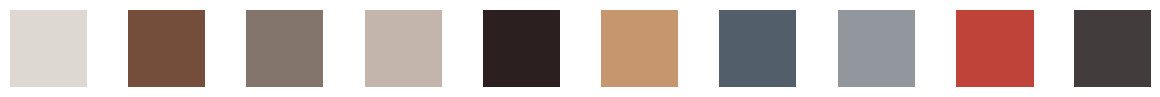

In [125]:

fig, ax = plt.subplots(1, len(center), figsize=(15, 1))

# Plot each color
for i, color in enumerate(center):
    ax[i].imshow([[color/255]])
    ax[i].axis('off')

plt.show()


# Same for scaled data

In [126]:
scaler = RobustScaler()

In [127]:
X_scaled = scaler.fit_transform(X)

In [128]:
est = KMeans(n_clusters=number_of_clusters, random_state=42).fit(X_scaled)

In [129]:
# Get cluster centroids
centroids_scaled = est.cluster_centers_

In [130]:
centroids_scaled

array([[ 0.66412338,  0.65649801,  0.58606466],
       [-0.16507439, -0.21670675, -0.28834527],
       [-0.98394284, -0.90657963, -0.81895761],
       [-0.15208189,  0.06513174,  0.17748842],
       [ 0.56473853,  0.25666875, -0.06291315],
       [-0.39325896, -0.65030425, -0.72766947],
       [-0.71899299, -0.4503672 , -0.26520764],
       [ 0.52120033, -0.60710178, -0.63460171],
       [ 0.8464461 ,  0.99756157,  1.01865044],
       [ 0.17561762,  0.40674367,  0.51397541]])

In [131]:
center_scaled = scaler.inverse_transform(centroids_scaled)

In [132]:
center_scaled

array([[203.75584485, 184.71081296, 171.6761424 ],
       [124.15285866, 102.62956591,  88.60719958],
       [ 45.54148714,  37.78151494,  38.1990271 ],
       [125.4001386 , 129.12238392, 132.86139986],
       [194.21489842, 147.1268623 , 110.02325056],
       [102.24714004,  61.87140039,  46.87140039],
       [ 70.97667343,  80.66548343,  90.80527383],
       [190.03523166,  65.93243243,  55.71283784],
       [221.2588255 , 216.77078802, 212.77179187],
       [156.85929154, 161.23390498, 164.82766376]])

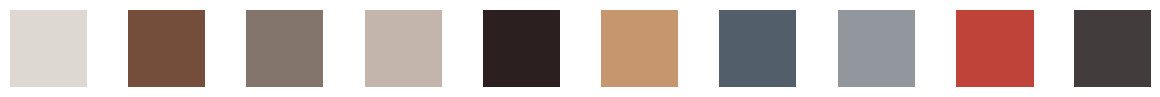

In [133]:
fig, ax = plt.subplots(1, len(center), figsize=(15, 1))

# Plot each color
for i, color in enumerate(center):
    ax[i].imshow([[color/255]])
    ax[i].axis('off')

plt.show()

